# 1. Import and Install Dependencies

In [2]:
!pip install tensorflow tensorflow-gpu opencv-python mediapipe sklearn matplotlib

^C


In [27]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [28]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [29]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [30]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [31]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [41]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>


In [45]:
len(results.left_hand_landmarks.landmark)

21

In [42]:
results

mediapipe.python.solution_base.SolutionOutputs

In [43]:
draw_landmarks(frame, results)

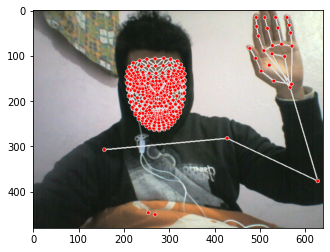

In [44]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [69]:
len(results.left_hand_landmarks.landmark)

468

In [46]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [47]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [48]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() 
    if results.face_landmarks 
    else np.zeros(1404)


IndentationError: unexpected indent (Temp/ipykernel_14612/1373052555.py, line 2)

In [49]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [50]:
result_test = extract_keypoints(results)

In [75]:
result_test

array([ 0.57556903,  0.43762749, -0.62469023, ...,  0.73497295,
        1.0893544 , -0.03403202])

In [115]:
468*3+33*4+21*3+21*3

1662

In [76]:
np.save('0', result_test)

In [77]:
np.load('0.npy')

array([ 0.57556903,  0.43762749, -0.62469023, ...,  0.73497295,
        1.0893544 , -0.03403202])

# 4. Setup Folders for Collection

In [51]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [ ]:
# hello
## 0
## 1
## 2
## ...
## 29
# thanks

# I love you

In [79]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [80]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [82]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [52]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [53]:
label_map = {label:num for num, label in enumerate(actions)}

In [54]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [86]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [56]:
np.array(sequences).shape

NameError: name 'sequences' is not defined

In [88]:
np.array(labels).shape

(90,)

In [89]:
X = np.array(sequences)

In [90]:
X.shape

(90, 30, 1662)

In [91]:
y = to_categorical(labels).astype(int)

In [92]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [94]:
y_test.shape

(5, 3)

# 7. Build and Train LSTM Neural Network

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [17]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [69]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [70]:
res = [.7, 0.2, 0.1]

In [71]:
actions[np.argmax(res)]

'hello'

In [72]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [147]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 5s 154ms/step - loss: 2.5972 - categorical_accuracy: 0.3294
Epoch 2/2000
3/3 [==============================] - 0s 159ms/step - loss: 7.1249 - categorical_accuracy: 0.3294
Epoch 3/2000
3/3 [==============================] - 0s 161ms/step - loss: 3.7966 - categorical_accuracy: 0.2824
Epoch 4/2000
3/3 [==============================] - 1s 172ms/step - loss: 1.7194 - categorical_accuracy: 0.3412
Epoch 5/2000
3/3 [==============================] - 0s 159ms/step - loss: 1.0421 - categorical_accuracy: 0.4235
Epoch 6/2000
3/3 [==============================] - 0s 163ms/step - loss: 0.9996 - categorical_accuracy: 0.5529
Epoch 7/2000
3/3 [==============================] - 0s 162ms/step - loss: 1.1210 - categorical_accuracy: 0.5059
Epoch 8/2000
3/3 [==============================] - 1s 172ms/step - loss: 0.9765 - categorical_accuracy: 0.4471
Epoch 9/2000
3/3 [==============================] - 0s 162ms/step - loss: 1.0856 - categorical_accuracy:

3/3 [==============================] - 1s 185ms/step - loss: 1.3841 - categorical_accuracy: 0.3882
Epoch 145/2000
3/3 [==============================] - 0s 152ms/step - loss: 1.3739 - categorical_accuracy: 0.4471
Epoch 146/2000
3/3 [==============================] - 1s 191ms/step - loss: 1.4707 - categorical_accuracy: 0.3882
Epoch 147/2000
3/3 [==============================] - 1s 187ms/step - loss: 1.4724 - categorical_accuracy: 0.4118
Epoch 148/2000
3/3 [==============================] - 1s 182ms/step - loss: 1.3644 - categorical_accuracy: 0.4118
Epoch 149/2000
3/3 [==============================] - 1s 208ms/step - loss: 1.2241 - categorical_accuracy: 0.3529
Epoch 150/2000
3/3 [==============================] - 1s 192ms/step - loss: 1.1488 - categorical_accuracy: 0.3412
Epoch 151/2000
3/3 [==============================] - 1s 173ms/step - loss: 1.0498 - categorical_accuracy: 0.4353
Epoch 152/2000
3/3 [==============================] - 0s 158ms/step - loss: 1.0021 - categorical_accura

Epoch 216/2000
3/3 [==============================] - 1s 199ms/step - loss: 0.7317 - categorical_accuracy: 0.6706
Epoch 217/2000
3/3 [==============================] - 0s 164ms/step - loss: 0.7052 - categorical_accuracy: 0.6824
Epoch 218/2000
3/3 [==============================] - 1s 186ms/step - loss: 0.7256 - categorical_accuracy: 0.6824
Epoch 219/2000
3/3 [==============================] - 1s 179ms/step - loss: 0.6919 - categorical_accuracy: 0.6824
Epoch 220/2000
3/3 [==============================] - 1s 177ms/step - loss: 0.7174 - categorical_accuracy: 0.6471
Epoch 221/2000
3/3 [==============================] - 0s 165ms/step - loss: 0.7010 - categorical_accuracy: 0.6941
Epoch 222/2000
3/3 [==============================] - 1s 176ms/step - loss: 0.8036 - categorical_accuracy: 0.6353
Epoch 223/2000
3/3 [==============================] - 0s 149ms/step - loss: 0.7343 - categorical_accuracy: 0.6706
Epoch 224/2000
3/3 [==============================] - 0s 152ms/step - loss: 0.8584 - cat

3/3 [==============================] - 1s 187ms/step - loss: 0.3747 - categorical_accuracy: 0.8941
Epoch 359/2000
3/3 [==============================] - 1s 185ms/step - loss: 0.4490 - categorical_accuracy: 0.8588
Epoch 360/2000
3/3 [==============================] - 1s 186ms/step - loss: 0.4056 - categorical_accuracy: 0.8588
Epoch 361/2000
3/3 [==============================] - 1s 177ms/step - loss: 0.3875 - categorical_accuracy: 0.8824
Epoch 362/2000
3/3 [==============================] - 1s 177ms/step - loss: 0.3889 - categorical_accuracy: 0.8941
Epoch 363/2000
3/3 [==============================] - 1s 179ms/step - loss: 0.3718 - categorical_accuracy: 0.9059
Epoch 364/2000
3/3 [==============================] - 0s 161ms/step - loss: 0.3851 - categorical_accuracy: 0.8824
Epoch 365/2000
3/3 [==============================] - 1s 169ms/step - loss: 0.3938 - categorical_accuracy: 0.9176
Epoch 366/2000
3/3 [==============================] - 0s 167ms/step - loss: 0.4656 - categorical_accura

Epoch 430/2000
3/3 [==============================] - 0s 147ms/step - loss: 0.2710 - categorical_accuracy: 0.9176
Epoch 431/2000
3/3 [==============================] - 0s 154ms/step - loss: 0.2643 - categorical_accuracy: 0.9294
Epoch 432/2000
3/3 [==============================] - 0s 148ms/step - loss: 0.2809 - categorical_accuracy: 0.9176
Epoch 433/2000
3/3 [==============================] - 0s 156ms/step - loss: 0.2899 - categorical_accuracy: 0.9294
Epoch 434/2000
3/3 [==============================] - 0s 154ms/step - loss: 0.2903 - categorical_accuracy: 0.9059
Epoch 435/2000
3/3 [==============================] - 0s 156ms/step - loss: 0.2603 - categorical_accuracy: 0.9412
Epoch 436/2000
3/3 [==============================] - 0s 149ms/step - loss: 0.3115 - categorical_accuracy: 0.8706
Epoch 437/2000
3/3 [==============================] - 0s 157ms/step - loss: 0.2635 - categorical_accuracy: 0.9529
Epoch 438/2000
3/3 [==============================] - 0s 156ms/step - loss: 0.2548 - cat

KeyboardInterrupt: 

In [148]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 30, 64)            442112    
                                                                 
 lstm_4 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-tr

# 8. Make Predictions

In [55]:
res = model.predict(X_test)

NameError: name 'X_test' is not defined

In [62]:
actions[np.argmax(res[4])]

IndexError: index 4 is out of bounds for axis 0 with size 3

In [151]:
actions[np.argmax(y_test[4])]

'iloveyou'

# 9. Save Weights

In [152]:
model.save('action.h5')

In [141]:
del model

In [73]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [19]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [155]:
yhat = model.predict(X_test)

In [156]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [157]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[4, 0],
        [1, 0]],

       [[0, 1],
        [0, 4]]], dtype=int64)

accuracy_score(ytrue, yhat)

# 11. Test in Real Time

In [57]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [58]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [59]:
sequence.reverse()

TypeError: 'NormalizedLandmark' object is not iterable

<Figure size 1296x1296 with 0 Axes>

In [60]:
len(sequence)

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [127]:
sequence.append('def')

In [128]:
sequence.reverse()

In [129]:
sequence[-30:]

[array([ 0.68317747,  0.49399653, -0.68813694, ...,  0.58958077,
         0.56099027, -0.08394206]),
 array([ 0.6828872 ,  0.49279487, -0.64808142, ...,  0.63720238,
         0.55359614, -0.01291737]),
 array([ 0.67234248,  0.49368012, -0.61320955, ...,  0.64726388,
         0.57374704, -0.00353546]),
 array([ 0.67035908,  0.49719059, -0.56694949, ...,  0.64647561,
         0.57942092, -0.00153563]),
 array([ 0.66840672,  0.49748453, -0.57680666, ...,  0.6447432 ,
         0.57572651, -0.0151694 ]),
 array([ 0.67144763,  0.49771565, -0.60671628, ...,  0.62118781,
         0.54897916, -0.03565469]),
 array([ 0.67358768,  0.50180358, -0.84896553, ...,  0.5839774 ,
         0.58375323, -0.07942791]),
 array([ 0.67449051,  0.50176215, -0.73860216, ...,  0.62516046,
         0.55037868, -0.04327747]),
 array([ 0.67464697,  0.50167173, -0.61808288, ...,  0.64642888,
         0.56608802, -0.01159629]),
 array([ 0.67361259,  0.50296986, -0.61069262, ...,  0.65035218,
         0.58083582,  0.00

In [63]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.4

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        print(' '.join(sentence))
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>

<class 'mediapipe.python.solution_base.SolutionOutputs'>

<class 'mediapipe.python.solution_base.SolutionOutputs'>

<class 'mediapipe.python.solution_base.SolutionOutputs'>

<class 'mediapipe.python.solution_base.SolutionOutputs'>

<class 'mediapipe.python.solution_base.SolutionOutputs'>

<class 'mediapipe.python.solution_base.SolutionOutputs'>

<class 'mediapipe.python.solution_base.SolutionOutputs'>

<class 'mediapipe.python.solution_base.SolutionOutputs'>

<class 'mediapipe.python.solution_base.SolutionOutputs'>

<class 'mediapipe.python.solution_base.SolutionOutputs'>

<class 'mediapipe.python.solution_base.SolutionOutputs'>

<class 'mediapipe.python.solution_base.SolutionOutputs'>

<class 'mediapipe.python.solution_base.SolutionOutputs'>

<class 'mediapipe.python.solution_base.SolutionOutputs'>

<class 'mediapipe.python.solution_base.SolutionOutputs'>

<class 'mediapipe.python.solution_base.SolutionOutputs'>

<class 'mediap

thanks
iloveyou hello thanks hello thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
iloveyou hello thanks hello thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
iloveyou hello thanks hello thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
iloveyou hello thanks hello thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
iloveyou hello thanks hello thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
iloveyou hello thanks hello thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
iloveyou hello thanks hello thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
iloveyou hello thanks hello thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
iloveyou hello thanks hello thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
iloveyou hello thanks hello thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
ilo

<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
thanks iloveyou thanks iloveyou thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
thanks iloveyou thanks iloveyou thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
thanks iloveyou thanks iloveyou thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
thanks iloveyou thanks iloveyou thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
thanks iloveyou thanks iloveyou thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
thanks iloveyou thanks iloveyou thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
thanks iloveyou thanks iloveyou thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
thanks iloveyou thanks iloveyou thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
thanks iloveyou thanks iloveyou thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
thanks il

<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
thanks iloveyou thanks iloveyou thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
thanks iloveyou thanks iloveyou thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
thanks iloveyou thanks iloveyou thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
iloveyou thanks iloveyou thanks hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
thanks iloveyou thanks hello iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
thanks iloveyou thanks hello iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
iloveyou thanks hello iloveyou hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
iloveyou thanks hello iloveyou hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
iloveyou thanks hello iloveyou hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
iloveyou thanks hel

In [20]:
cap.release()
cv2.destroyAllWindows()

In [167]:
res[np.argmax(res)] > threshold

False

In [ ]:
(num_sequences,30,1662)

In [240]:
model.predict(np.expand_dims(X_test[0], axis=0))

array([[5.532469e-04, 9.974770e-01, 1.969744e-03]], dtype=float32)

In [64]:
# 12. Test in Real Time refined

In [65]:
from scipy import stats

In [66]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

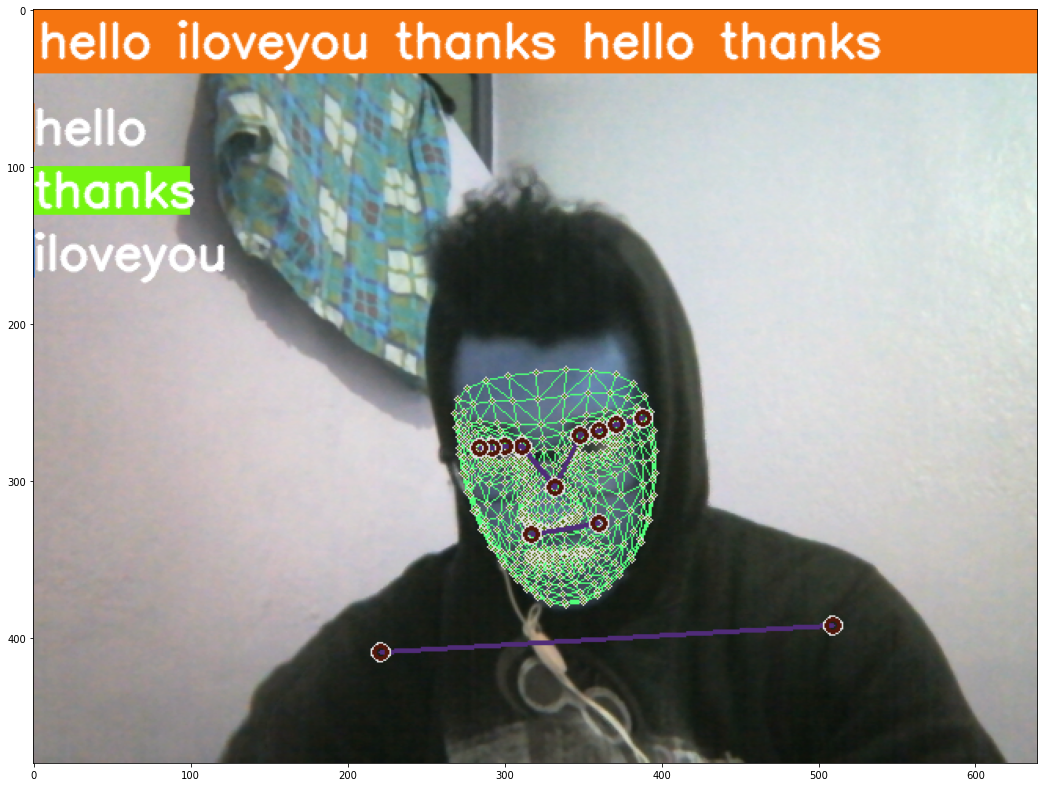

In [67]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [76]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti